In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statistics

In [19]:
# Mean , Median , Mode
df=sns.load_dataset("tips")

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
np.mean(df['total_bill'])

19.78594262295082

In [11]:
np.median(df["total_bill"])

17.795

In [12]:
statistics.mode(df["total_bill"])

13.42

c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='total_bill'>

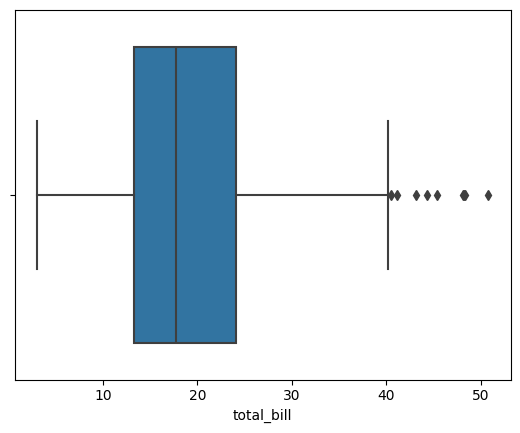

In [13]:
sns.boxplot(df["total_bill"])

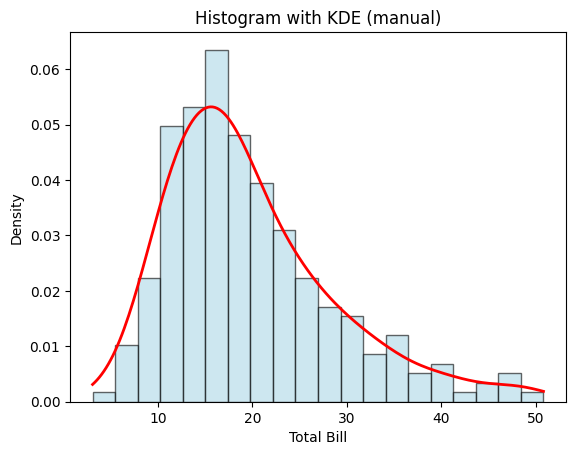

In [36]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

data = df["total_bill"].dropna()  # Remove NaNs
density = gaussian_kde(data)
xs = np.linspace(data.min(), data.max(), 200)

plt.hist(data, bins=20, density=True, alpha=0.6, color='lightblue', edgecolor='black')
plt.plot(xs, density(xs), color='red', linewidth=2)
plt.title("Histogram with KDE (manual)")
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.show()


In [39]:
# Previus data is not Normal distribution so we are using Iris data
data=sns.load_dataset("iris")

In [40]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Axes: xlabel='sepal_length'>

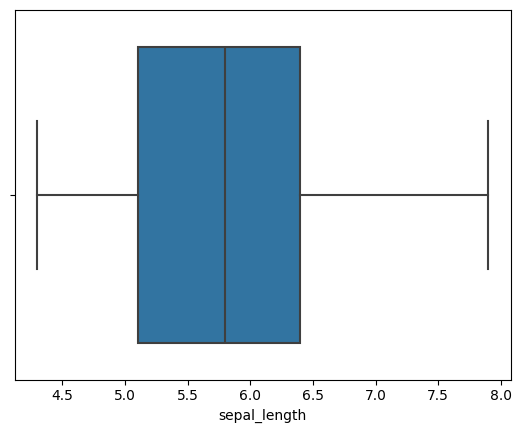

In [45]:
sns.boxplot(data['sepal_length'])

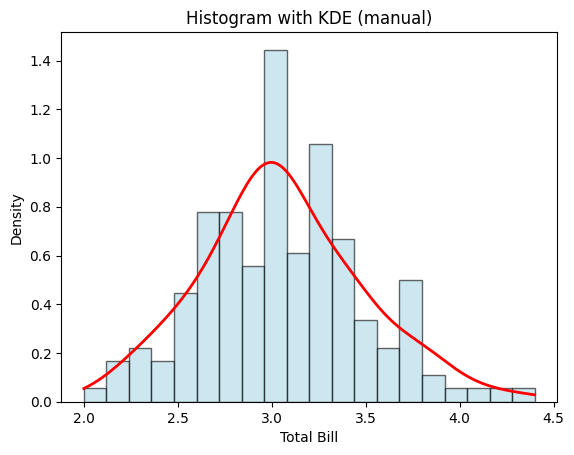

In [47]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

data1 = data['sepal_width'].dropna()  # Remove NaNs
density = gaussian_kde(data1)
xs = np.linspace(data1.min(), data1.max(), 200)

plt.hist(data1, bins=20, density=True, alpha=0.6, color='lightblue', edgecolor='black')
plt.plot(xs, density(xs), color='red', linewidth=2)
plt.title("Histogram with KDE (manual)")
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.show()


c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Axes: xlabel='species', ylabel='count'>

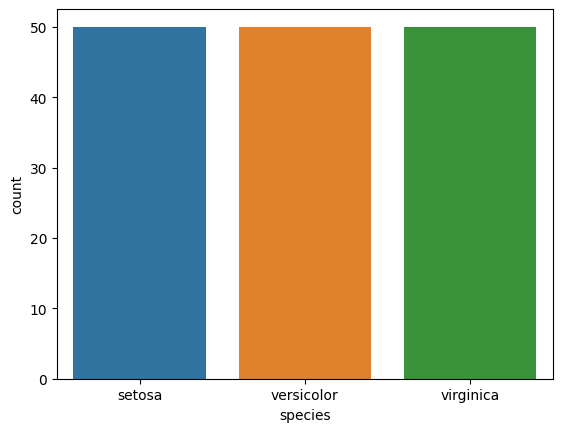

In [48]:
sns.countplot(data["species"])

In [54]:
np.percentile(data['sepal_length'],[25,75])

# IQR (6.4-5.1)

array([5.1, 6.4])

In [57]:
'''Topics- 
IQR -python
Probability 
Outliers
'''



'Topics- \nIQR -python\nProbability \nOutliers\n'

##### Outliers using Z-score and IQR method

In [58]:
## Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

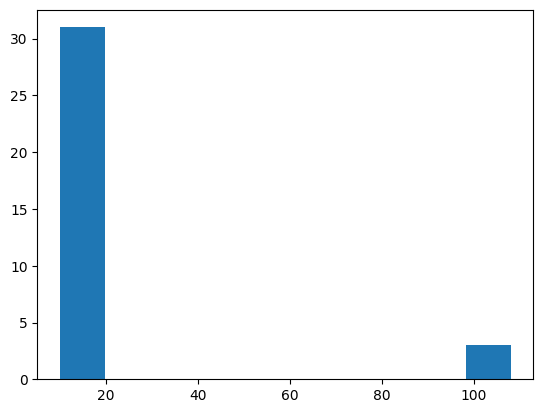

In [60]:
plt.hist(dataset)

In [63]:
## Using Zscore find outliers  probably after 3rd standard Dev. data is oulier
outliers=[]
def detect_outlier(data):
    threshold=3 #3 3rd standard deviation
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        #Z_score formula (xi - u)/std
        z_score=(i-mean)/std
        ## checking outlier
        #np.abs for round off
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

detect_outlier(dataset)


[102, 107, 108]

##### IQR
1. Sort the data
2. Calculate Q1 Aand Q3
3. IQR = Q3 - Q2
3. Find the Lower fence (q1 - 1.5*IQR)
4. Find the Upper fence (q3 + 1.5*IQR)


In [64]:
dataset=sorted(dataset)

In [65]:
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [66]:
q1,q3=np.percentile(dataset,[25,75])

In [67]:
print(q1,q3)

12.0 15.0


In [68]:
IQR=q3-q1
lower_fence=q1-(1.5*IQR)
upper_fence=q3+(1.5*IQR)

In [69]:
print(IQR,lower_fence,upper_fence)

3.0 7.5 19.5


c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Axes: >

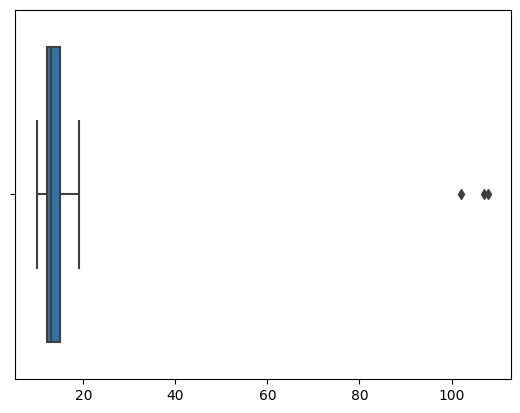

In [70]:
sns.boxplot(dataset)

In [74]:
# Values without outliers
data_without_outliers = [x for x in dataset if lower_fence <= x <= upper_fence]
print("Without outliers:", data_without_outliers)

# Values that are outliers
outliers = [x for x in dataset if x < lower_fence or x > upper_fence]
print("Outliers:", outliers)


Without outliers: [10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19]
Outliers: [102, 107, 108]


c:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Axes: >

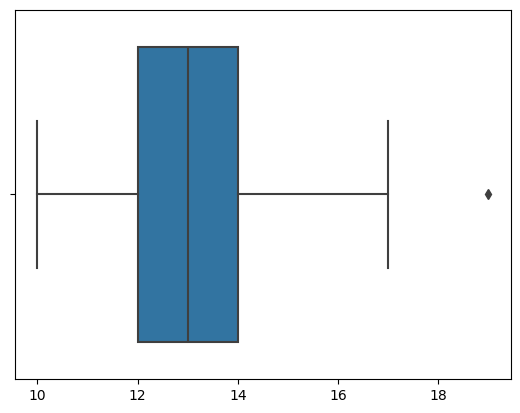

In [75]:
sns.boxplot(data_without_outliers)